---
title: Auxilliary Networks Showcase
subtitle: Fitting shapes using NIGnets powered by Auxilliary Networks
date: 2025-03-02
---

We now fit Injective Networks powered by Auxilliary Networks to some target shapes to get a sense of
their representation power and shortcomings.

In [1]:
# Basic imports
import torch
from torch import nn
import geosimilarity as gs
from NIGnets import NIGnet
from NIGnets.monotonic_nets import SmoothMinMaxNet

from assets.utils import automate_training, plot_curves

We will use the following network architecture for PreAux nets in this showcase. Users need to
define their own PreAux net architectures similarly making sure that the conditions on the output
are met [](#preaux_net_conditions).

In [2]:
class PreAuxNet(nn.Module):
    def __init__(self, layer_count, hidden_dim):
        super().__init__()

        # Pre-Auxilliary net needs closed transform to get same r at theta = 0, 2pi
        self.closed_transform = lambda t: torch.hstack([
            torch.cos(2 * torch.pi * t),
            torch.sin(2 * torch.pi * t)
        ])

        layers = [nn.Linear(2, hidden_dim), nn.BatchNorm1d(hidden_dim), nn.PReLU()]
        for i in range(layer_count):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.PReLU())
        layers.append(nn.Linear(hidden_dim, 1))
        layers.append(nn.ReLU())

        self.forward_stack = nn.Sequential(*layers)
    
    def forward(self, t):
        unit_circle = self.closed_transform(t) # Rows are cos(theta), sin(theta)
        r = self.forward_stack(unit_circle)
        x = r * unit_circle # Each row is now r*cos(theta), r*sin(theta)
        return x

## Pre-Auxilliary Networks

## Circle and Square

Training Circle Net:
Epoch: [   1/1000]. Loss:    0.651552
Epoch: [ 200/1000]. Loss:    0.000073
Epoch: [ 400/1000]. Loss:    0.000042
Epoch: [ 600/1000]. Loss:    0.000045
Epoch: [ 800/1000]. Loss:    0.000041
Epoch: [1000/1000]. Loss:    0.000022
Training Square Net:
Epoch: [   1/1000]. Loss:    0.843364
Epoch: [ 200/1000]. Loss:    0.000456
Epoch: [ 400/1000]. Loss:    0.000986
Epoch: [ 600/1000]. Loss:    0.000112
Epoch: [ 800/1000]. Loss:    0.000343
Epoch: [1000/1000]. Loss:    0.000103


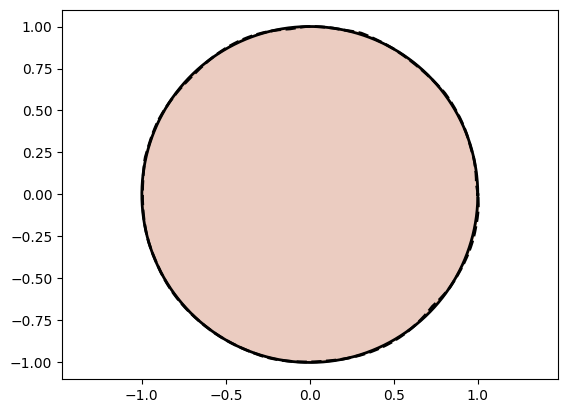

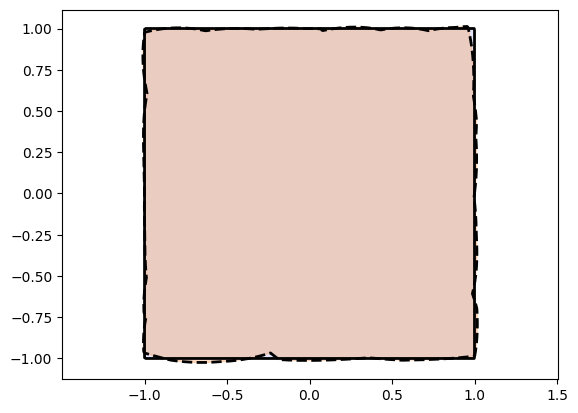

In [9]:
from assets.shapes import circle, square

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_circle = circle(num_pts)
Xt_square = square(num_pts)

# Initialize networks to learn the target shapes and train
preaux_net = PreAuxNet(layer_count = 2, hidden_dim = 5)
circle_net = NIGnet(layer_count = 3, preaux_net = preaux_net, act_fn = nn.SELU)
square_net = NIGnet(layer_count = 3, preaux_net = preaux_net, act_fn = nn.SELU)

print('Training Circle Net:')
automate_training(
    model = circle_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_circle,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)
print('Training Square Net:')
automate_training(
    model = square_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_square,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)

# Get final curve represented by the networks
Xc_circle = circle_net(t)
Xc_square = square_net(t)

# Plot the curves
plot_curves(Xc_circle, Xt_circle)
plot_curves(Xc_square, Xt_square)

## Stanford Bunny

Epoch: [    1/10000]. Loss:    0.440139
Epoch: [ 2000/10000]. Loss:    0.000972
Epoch: [ 4000/10000]. Loss:    0.000303
Epoch: [ 6000/10000]. Loss:    0.000278
Epoch: [ 8000/10000]. Loss:    0.000266
Epoch: [10000/10000]. Loss:    0.000251


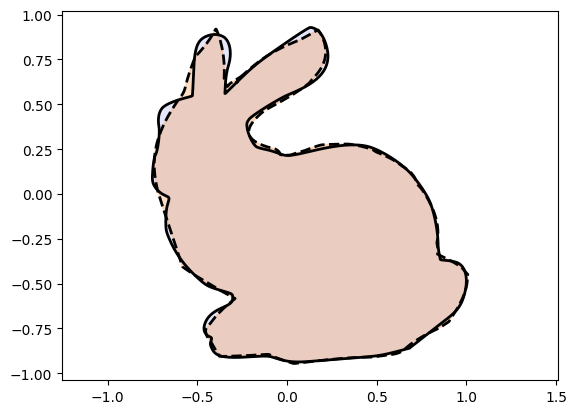

In [13]:
from assets.shapes import stanford_bunny

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = stanford_bunny(num_pts)

preaux_net = PreAuxNet(layer_count = 2, hidden_dim = 10)
nig_net = NIGnet(layer_count = 5, preaux_net = preaux_net, act_fn = nn.SELU)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Heart

Epoch: [    1/10000]. Loss:    0.561411
Epoch: [ 2000/10000]. Loss:    0.000165
Epoch: [ 4000/10000]. Loss:    0.000013
Epoch: [ 6000/10000]. Loss:    0.000012
Epoch: [ 8000/10000]. Loss:    0.000011
Epoch: [10000/10000]. Loss:    0.000011


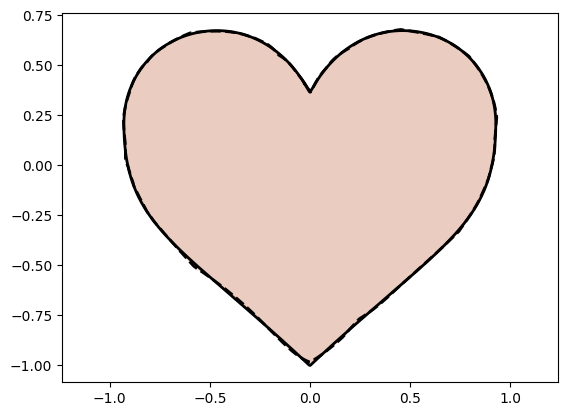

In [15]:
from assets.shapes import heart

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = heart(num_pts)

preaux_net = PreAuxNet(layer_count = 2, hidden_dim = 10)
nig_net = NIGnet(layer_count = 5, preaux_net = preaux_net, act_fn = nn.SELU)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Hand

Epoch: [    1/10000]. Loss:    0.692996
Epoch: [ 2000/10000]. Loss:    0.002578
Epoch: [ 4000/10000]. Loss:    0.001467
Epoch: [ 6000/10000]. Loss:    0.001278
Epoch: [ 8000/10000]. Loss:    0.000983
Epoch: [10000/10000]. Loss:    0.000533


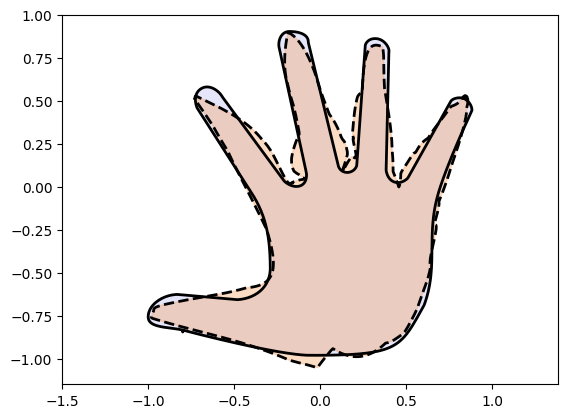

In [18]:
from assets.shapes import hand

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = hand(num_pts)

preaux_net = PreAuxNet(layer_count = 2, hidden_dim = 10)
nig_net = NIGnet(layer_count = 5, preaux_net = preaux_net, act_fn = nn.SELU)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Airplane

Epoch: [    1/10000]. Loss:    0.864464
Epoch: [ 2000/10000]. Loss:    0.001621
Epoch: [ 4000/10000]. Loss:    0.001200
Epoch: [ 6000/10000]. Loss:    0.000993
Epoch: [ 8000/10000]. Loss:    0.000815
Epoch: [10000/10000]. Loss:    0.000728


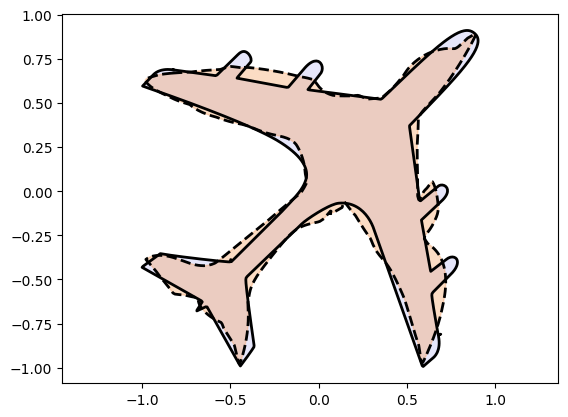

In [22]:
from assets.shapes import airplane

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = airplane(num_pts)

preaux_net = PreAuxNet(layer_count = 2, hidden_dim = 25)
nig_net = NIGnet(layer_count = 5, preaux_net = preaux_net, act_fn = nn.SELU)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)